In [2]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
conn = psycopg2.connect(
    dbname="youcan",
    user="admin",
    password="admin",
    host="localhost",
    port="5432"
)

In [4]:
with open("../sql/cohort_analysis.sql", "r") as f:
    cohort_query = f.read()

# Exécution
df = pd.read_sql(cohort_query, conn)
conn.close()


C:\Users\bayah\AppData\Local\Temp\ipykernel_7288\659520689.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(cohort_query, conn)


In [6]:
df['cohort_month'] = pd.to_datetime(df['cohort_month'])
df['activity_week'] = pd.to_datetime(df['activity_week'])

In [7]:
retention_matrix = df.pivot_table(
    index='cohort_month',
    columns='week_number',
    values='retained_users',
    fill_value=0
)

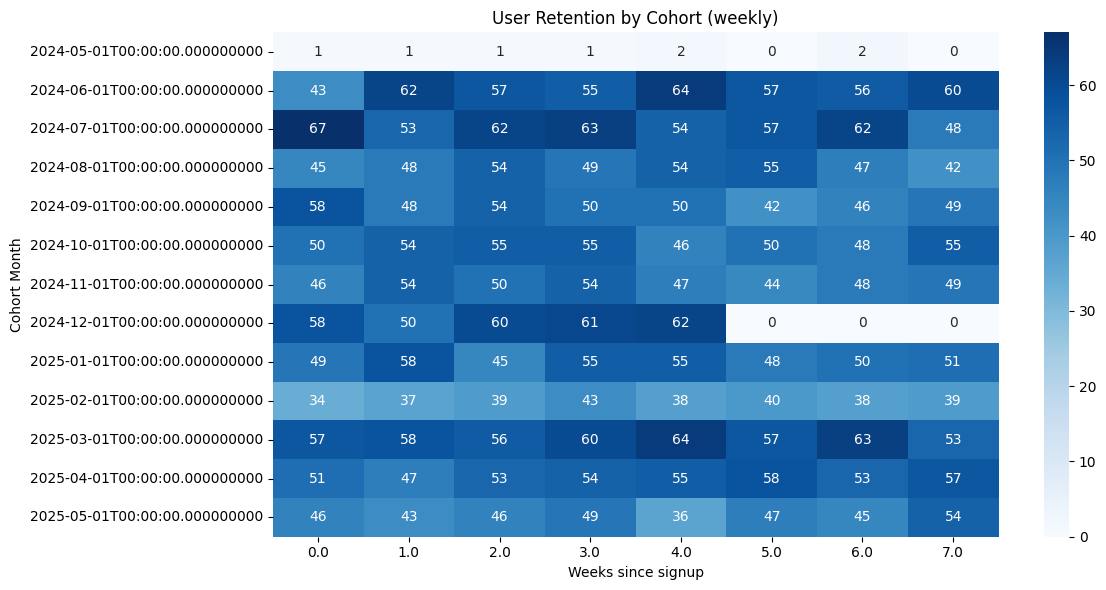

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(retention_matrix, annot=True, fmt='.0f', cmap="Blues")
plt.title("User Retention by Cohort (weekly)")
plt.ylabel("Cohort Month")
plt.xlabel("Weeks since signup")
plt.tight_layout()
plt.show()